In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

# Jupyter Notebook'un zekasını etkinleştirir.
%config IPCompleter.greedy=True

# Tüm içerikleri göstermeyi sağlar. 
pd.set_option('display.max_colwidth', None)

In [2]:
train = pd.read_csv("titanic_train.csv")

display(train.head())

print(train.info())
print(train.describe())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

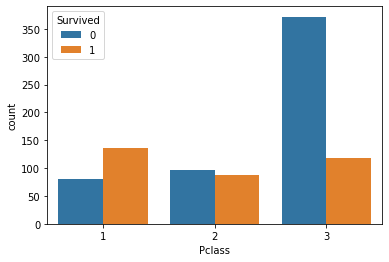

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
3    491
1    216
2    184
Name: Pclass, dtype: int64


In [3]:
sns.countplot(x="Pclass",hue="Survived",data = train)
plt.show()

# klaslara göre hayatta kalma oranı
print(train["Survived"].groupby(train["Pclass"]).mean())

# klaslara göre hayatta kalan sayısı
print(train["Pclass"].value_counts())

In [4]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Bu kısımda isimlerini silip ön eklerini aldık
train["Title"] = train['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

print(train["Title"].value_counts())

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64


In [5]:
print(train["Survived"].groupby(train["Title"]).mean().sort_values(ascending=False))
# ilk 7 sinin hayatta kalma olasılığı çok falza, sonraki altısının ise orta derece, kalanların ise çok düşük.

Title
the Countess    1.000000
Mlle            1.000000
Sir             1.000000
Ms              1.000000
Lady            1.000000
Mme             1.000000
Mrs             0.792000
Miss            0.697802
Master          0.575000
Col             0.500000
Major           0.500000
Dr              0.428571
Mr              0.156673
Jonkheer        0.000000
Rev             0.000000
Don             0.000000
Capt            0.000000
Name: Survived, dtype: float64


In [6]:
train["Age"].isnull().sum()

177

In [7]:
train["Ticket"].head(15)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
Name: Ticket, dtype: object

In [8]:
# biletlerin ilk harfini almamız lazım
train["Ticket_first"] = train["Ticket"].apply(lambda x: str(x)[0])

print(train["Ticket_first"].value_counts())

print(train.groupby("Ticket_first")["Survived"].mean().sort_values(ascending=False))

3    301
2    183
1    146
P     65
S     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket_first, dtype: int64
Ticket_first
9    1.000000
P    0.646154
1    0.630137
F    0.571429
2    0.464481
C    0.340426
S    0.323077
L    0.250000
3    0.239203
4    0.200000
6    0.166667
W    0.153846
7    0.111111
A    0.068966
5    0.000000
8    0.000000
Name: Survived, dtype: float64


In [9]:
# sanırım bu kod ücret verenleri 3 e bölüyor
print(pd.cut(train['Fare'], 3).value_counts())

# hayatta kalma oranlarına göre ödenen ücretler
print(train['Survived'].groupby(pd.cut(train['Fare'], 3)).mean())

(-0.512, 170.776]     871
(170.776, 341.553]     17
(341.553, 512.329]      3
Name: Fare, dtype: int64
Fare
(-0.512, 170.776]     0.376579
(170.776, 341.553]    0.647059
(341.553, 512.329]    1.000000
Name: Survived, dtype: float64


In [10]:
# var olan kabin değerleri bunların ilk harflerinialsak yeterli
train["Cabin"].unique()

train["Cabin_first"] = train["Cabin"].apply(lambda x: str(x)[0])
# ilk harfleri alınan kabinlerin hayatta kalma sayıları
print(train["Cabin_first"].value_counts())

# ilk harfleri alınan kabinlerin hayatta kalma oranları
print(train.groupby("Cabin_first")["Survived"].mean().sort_values(ascending=False))

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_first, dtype: int64
Cabin_first
D    0.757576
E    0.750000
B    0.744681
F    0.615385
C    0.593220
G    0.500000
A    0.466667
n    0.299854
T    0.000000
Name: Survived, dtype: float64


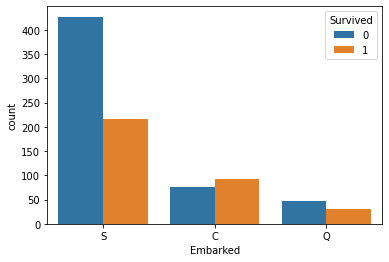

S    644
C    168
Q     77
Name: Embarked, dtype: int64
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [11]:
# gemiye nerden bindiği (Embarked)

sns.countplot(x="Embarked", hue="Survived", data=train)
plt.show()

print(train["Embarked"].value_counts())

print(train["Survived"].groupby(train["Embarked"]).mean())

In [12]:
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [13]:
test['Fare'].fillna(train['Fare'].mean(), inplace = True)

In [14]:
# Imputers
# imputerler eksik değerleri doldurmada işine yararlar

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_embarked = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imp_age = IterativeImputer(max_iter=100, random_state=34, n_nearest_features=2)

# Impute Embarked
train["Embarked"] = imp_embarked.fit_transform(train[["Embarked"]])
test["Embarked"] = imp_embarked.transform(test[["Embarked"]])

# Impute Age
train["Age"] = np.round(imp_age.fit_transform(train[["Age"]]))
test["Age"] = np.round(imp_age.transform(test[["Age"]]))

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train["Sex"] = le.fit_transform(train[["Sex"]].values.ravel())
test["Sex"] = le.fit_transform(test[["Sex"]].values.ravel())

In [16]:
# bilet baş harfleri (apply = uygulamak)
train["Ticket"] = train["Ticket"].apply(lambda x: str(x)[0])
test["Ticket"] = train["Ticket"].apply(lambda x: str(x)[0])

# kabinlerin ilk harfleri
train["Cabin"] = train["Cabin"].apply(lambda x: str(x)[0])
test["Cabin"] = test["Cabin"].apply(lambda x: str(x)[0])

In [17]:
# şimdi sırada isimlerin başındai ünvanı almak var
# ünvanları virgüm ile nokta arasında yazılmış
# !!!!  anlamadığım kısım expand tam olarak ne işe yarıyor
train["Title"] = train["Name"].str.split(", ",expand=True)[1].str.split('.', expand=True)[0]
test["Title"] = test["Name"].str.split(", ",expand=True)[1].str.split(".", expand=True)[0]

In [18]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A,7.2500,n,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",0,38.0,1,0,P,71.2833,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,S,7.9250,n,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,1,53.1000,C,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,3,8.0500,n,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,2,13.0000,n,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,1,30.0000,B,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,30.0,1,2,W,23.4500,n,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,1,30.0000,C,C,Mr


In [19]:
# şimdi ise kategorileri gurupladım

def assign_label_ticket(first):
    if first in ["F", "1", "P", "9"]:
        return "Ticket_high"
    elif first in ["S", "C", "2"]:
        return "Ticket_middle"
    else:
        return "Ticket_low"
    
  
def assign_label_title(title):
    if title in ["the Countess", "Mlle", "Lady", "Ms", "Sir", "Mme", "Mrs", "Miss", "Master"]:
        return "Title_high"
    elif title in ["Major", "Col", "Dr"]:
        return "Title_middle"
    else:
        return "Title_low"
    
 
def assign_label_cabin(cabin):
    if cabin in ["D", "E", "B", "F", "C"]:
        return "Cabin_high"
    elif cabin in ["G", "A"]:
        return "Cabin_middle"
    else:
        return "Cabin_low"

In [20]:

train["Ticket"] = train["Ticket"].apply(assign_label_ticket)
test["Ticket"] = test["Ticket"].apply(assign_label_ticket)


train["Title"] = train["Title"].apply(assign_label_title)
test["Title"] = test["Title"].apply(assign_label_title)


train["Cabin"] = train["Cabin"].apply(assign_label_cabin)
test["Cabin"] = test["Cabin"].apply(assign_label_cabin)

In [21]:
# one hot encoding yaptım
train = pd.get_dummies(columns=["Pclass", "Embarked", "Ticket", "Cabin","Title"], data=train, drop_first=True)
test = pd.get_dummies(columns=["Pclass", "Embarked", "Ticket", "Cabin", "Title"], data=test, drop_first=True)

In [22]:
target = train["Survived"]
train.drop(["Survived", "SibSp", "Parch", "Name", "PassengerId"], axis=1, inplace=True)
test.drop(["SibSp", "Parch", "Name","PassengerId"], axis=1, inplace=True)

In [23]:
display(train.head())
display(test.head())

print(train.info())
print(test.info())

,Sex,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Ticket_Ticket_low,Ticket_Ticket_middle,Cabin_Cabin_low,Cabin_Cabin_middle,Title_Title_low,Title_Title_middle
0,1,22.0,7.2500,0,1,0,1,1,0,1,0,1,0
1,0,38.0,71.2833,0,0,0,0,0,0,0,0,0,0
2,0,26.0,7.9250,0,1,0,1,0,1,1,0,0,0
3,0,35.0,53.1000,0,0,0,1,0,0,0,0,0,0
4,1,35.0,8.0500,0,1,0,1,1,0,1,0,1,0


,Sex,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Ticket_Ticket_low,Ticket_Ticket_middle,Cabin_Cabin_low,Cabin_Cabin_middle,Title_Title_low,Title_Title_middle
0,1,34.0,7.8292,0,1,1,0,1,0,1,0,1,0
1,0,47.0,7.0000,0,1,0,1,0,0,1,0,0,0
2,1,62.0,9.6875,1,0,1,0,0,1,1,0,1,0
3,1,27.0,8.6625,0,1,0,1,0,0,1,0,1,0
4,0,22.0,12.2875,0,1,0,1,1,0,1,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sex                   891 non-null    int32  
 1   Age                   891 non-null    float64
 2   Fare                  891 non-null    float64
 3   Pclass_2              891 non-null    uint8  
 4   Pclass_3              891 non-null    uint8  
 5   Embarked_Q            891 non-null    uint8  
 6   Embarked_S            891 non-null    uint8  
 7   Ticket_Ticket_low     891 non-null    uint8  
 8   Ticket_Ticket_middle  891 non-null    uint8  
 9   Cabin_Cabin_low       891 non-null    uint8  
 10  Cabin_Cabin_middle    891 non-null    uint8  
 11  Title_Title_low       891 non-null    uint8  
 12  Title_Title_middle    891 non-null    uint8  
dtypes: float64(2), int32(1), uint8(10)
memory usage: 26.2 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 

In [24]:
#                                                Makine Öğrenmesi Kısmı

In [25]:
from sklearn.model_selection import train_test_split

x = train.values
y = target.values # target de train in hayatta kalma verileri var. Kısaca etiketler var.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=34, stratify=y)

In [26]:
from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(x_train,y_train)

print("Destek Vektör Makinesi Modeli Test Doğruluğu: {}".format(svm.score(x_test,y_test)))

Destek Vektör Makinesi Modeli Test Doğruluğu: 0.6871508379888268


In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(x_train,y_train)

print("Rastgele Orman Modeli Test Doğruluğu: {}".format(rf.score(x_test,y_test)))

Rastgele Orman Modeli Test Doğruluğu: 0.776536312849162
